# Usage of plot.py

The aim of this script is to allow simple plots using a one-line command

  * [mesh2d](#Mesh2d-action)
  * [var](#Var-action)
  * [3d_scalar_map](#3d-scalar-map-action)
  * [v_slice](#v_slice-action)
  * [h_slice](#h_slice-action)
  * [time_poly](#time_poly-action)
  * [history](#history-action)
  * [spec](#spec-action)
  * [spec-freq](#spec-freq-action)
  * [spec-ang](#spec-ang-action)

## The script

The script follow the same behaviour as other Telemac-Mascaret script the first argument is an action and then the specific options of that actions

In [1]:
!plot.py -h

usage: plot.py [-h]
               {mesh2d,var,3d_scalar_map,v_slice,h_slice,time_poly,history,spec,spec-freq,spec-ang,report,poly}
               ...

positional arguments:
  {mesh2d,var,3d_scalar_map,v_slice,h_slice,time_poly,history,spec,spec-freq,spec-ang,report,poly}
                        plot command to do
    mesh2d              Plot a 2d mesh can add boundary or liquid boundary
                        info
    var                 Plot a scalar map for a given variable and time/record
    3d_scalar_map       Plot a 3d representation of a 2D variable using
                        variable values as Z coordinates
    v_slice             Plot a vertical slice of a 3d mesh along a polyline
    h_slice             Plot a horizontal slice of a 3d mesh along a plane
                        number
    time_poly           Plot a timeseries on a polyline
    history             Plot history for a list of points
    spec                Plot the spectrum of a given point over quandrangle


## Mesh2d action

This is used to dsiplay mesh and we can add either the boundaries or the liquid boundaries.
This is using the following functions from postel:
  * plot2d_triangle_mesh
  * plot2d_annotate_bnd
  * plot2d_annotate_liq_bnd

In [2]:
!plot.py mesh2d -h

usage: plot.py mesh2d [-h] [-b BND_FILE] [--bnd | --liq-bnd] [-f FIG_NAME]
                      input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -b BND_FILE, --boundary-file BND_FILE
                        Name of the boundary file
  --bnd                 Adding type of boundary for each boundary node
  --liq-bnd             Adding number of liquid boundary for each boundary
                        node
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [3]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/telemac2d/m2wave
!plot.py mesh2d geo_m2wave.slf -f plot2d_mesh

        ~> Plotting plot2d_mesh


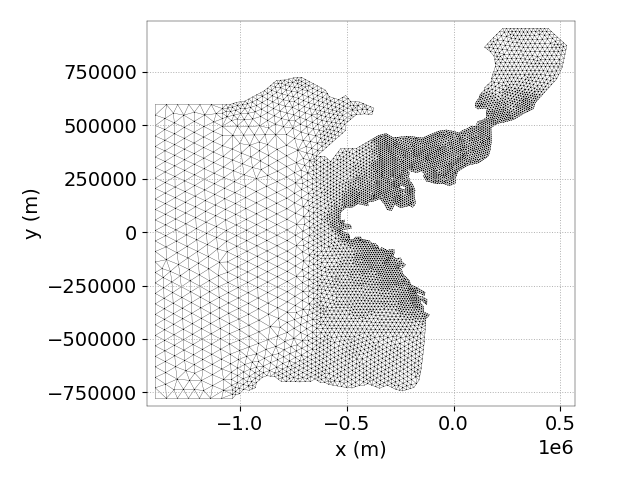

In [4]:
from IPython.display import Image
Image(filename='plot2d_mesh.png') 

### WIth type of boundary informations

In [5]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/telemac2d/m2wave
!plot.py mesh2d geo_m2wave.slf -b geo_m2wave.cli -f plot2d_mesh_bnd --bnd

        ~> Plotting plot2d_mesh_bnd


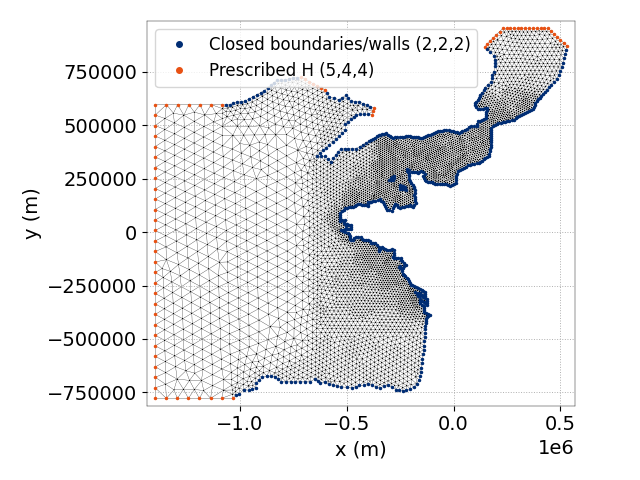

In [6]:
from IPython.display import Image
Image(filename='plot2d_mesh_bnd.png') 

### With liquid boundary informations

The numbering of the liquid boundaries is the same as the one in Telemac

In [7]:
!plot.py mesh2d geo_m2wave.slf -b geo_m2wave.cli -f plot2d_mesh_liq_bnd --liq-bnd

        ~> Plotting plot2d_mesh_liq_bnd


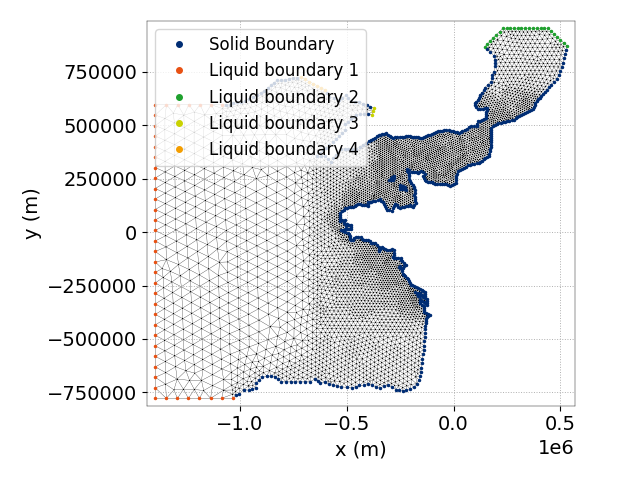

In [8]:
from IPython.display import Image
Image(filename='plot2d_mesh_liq_bnd.png') 

# Var action

This display a variable at a given record or time.
This is using the following function from postel:
   * plot2d_scalar_map
   * plot2d_triangle_mesh

In [9]:
!plot.py var -h

usage: plot.py var [-h] [-v VAR] [-r RECORD] [-t TIME] [--mesh] [-f FIG_NAME]
                   input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -v VAR, --var VAR     Name of the variable to display
  -r RECORD, --record RECORD
                        Record to display (If -1 is given will return the last
                        one)
  -t TIME, --time TIME  Time to display (will take the closest record)
  --mesh                Adds the mesh to the display
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [10]:
!plot.py var f2d_m2wave.slf --var="WATER DEPTH" --time=100000 -f plot2d_var --mesh

        ~> Plotting plot2d_var


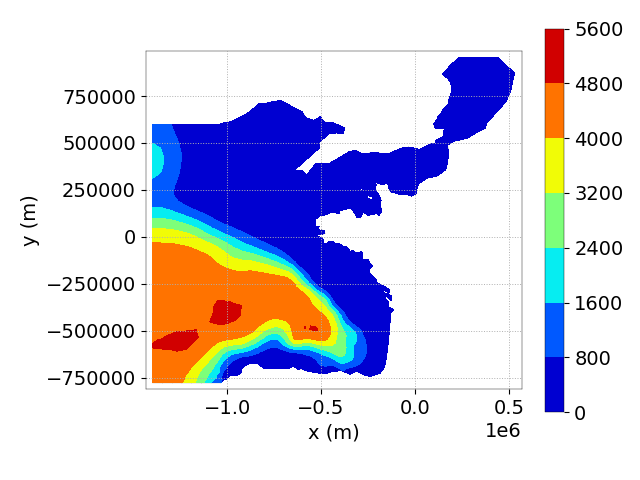

In [11]:
from IPython.display import Image
Image(filename='plot2d_var.png') 

# 3d scalar map action

This use the following function from postrl:
  * plot3d_scalar_map

In [12]:
!plot.py 3d_scalar_map -h

usage: plot.py 3d_scalar_map [-h] [-v VAR] [-r RECORD] [-t TIME] [--mesh]
                             [-f FIG_NAME]
                             input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -v VAR, --var VAR     Name of the variable to display
  -r RECORD, --record RECORD
                        Record to display (If -1 is given will return the last
                        one)
  -t TIME, --time TIME  Time to display (will take the closest record)
  --mesh                Adds the mesh to the display
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [13]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/telemac2d/gouttedo
!plot.py 3d_scalar_map f2d_gouttedo.slf --var="WATER DEPTH" --record=2 -f plot3d_scalar_map

        ~> Plotting plot3d_scalar_map


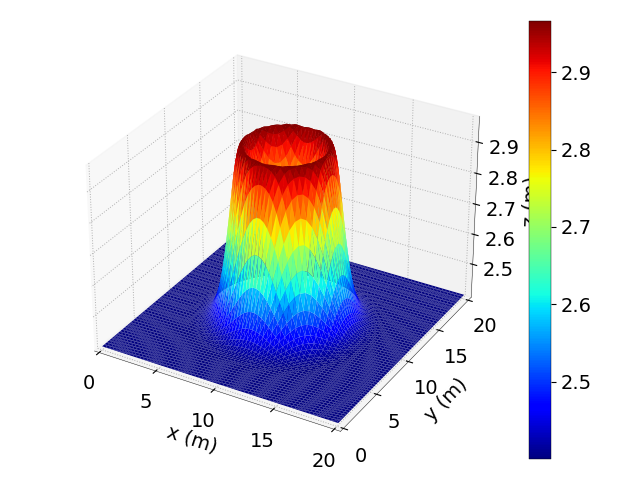

In [14]:
from IPython.display import Image
Image(filename='plot3d_scalar_map.png') 

# v_slice action

This is doing a vertical slive along a polyline from a given variable at a given time or record.
This use the following function from postel:
   * plot2d_triangle_mesh
   * plot2d_scalar_map
   * get_data_on_vertical_plane (from TelemacFile)

In [15]:
!plot.py v_slice -h

usage: plot.py v_slice [-h] [-v VAR] [--poly POLY [POLY ...]] [-r RECORD]
                       [-t TIME] [--mesh] [-f FIG_NAME]
                       input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -v VAR, --var VAR     Name of the variable to display
  --poly POLY [POLY ...]
                        Choose the points (xi,yi) where to extract use
                        --poly='x1,y1 x2,y2...'
  -r RECORD, --record RECORD
                        Record to display (If -1 is given will return the last
                        one)
  -t TIME, --time TIME  Time to display (will take the closest record)
  --mesh                Adds the mesh to the display
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [16]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/tomawac/3Dcoupling
!plot.py v_slice f3d_littoral.slf -v "VELOCITY U" -r -1 -f plot2d_v_slice --poly 0,150 1000,150

        ~> Plotting plot2d_v_slice


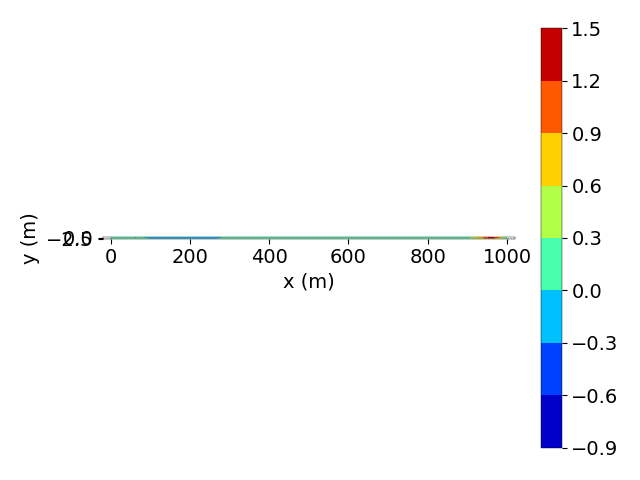

In [17]:
from IPython.display import Image
Image(filename='plot2d_v_slice.png')

# h_slice action

This dos a horizontal plot of a given plane at a given record/time for a given variable.
This use the following functions from postel:
   * plot2d_triangle_mesh
   * plot2d_scalar_map
   * get_data_on_horizontal_plane (from TelemacFile)

In [18]:
!plot.py h_slice -h

usage: plot.py h_slice [-h] [-v VAR] [--plane PLANE] [-r RECORD] [-t TIME]
                       [--mesh] [-f FIG_NAME]
                       input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -v VAR, --var VAR     Name of the variable to display
  --plane PLANE         Plane number to slice
  -r RECORD, --record RECORD
                        Record to display (If -1 is given will return the last
                        one)
  -t TIME, --time TIME  Time to display (will take the closest record)
  --mesh                Adds the mesh to the display
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [19]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/tomawac/3Dcoupling
!plot.py h_slice f3d_littoral.slf -v "VELOCITY U" -r -1 -f plot2d_h_slice --plane 0

        ~> Plotting plot2d_h_slice


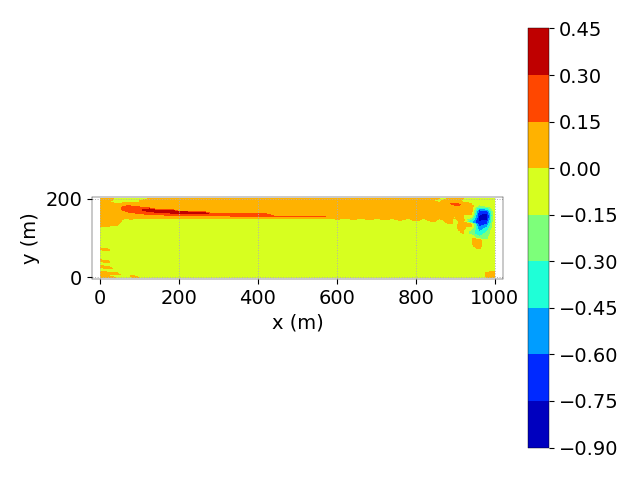

In [20]:
from IPython.display import Image
Image(filename='plot2d_h_slice.png')

# history action

This plot evolution over time of a list of points.
This use the following function from postel:
  * plot1d
  * get_timeseries_on_points (from TelemacFile)

In [21]:
!plot.py history -h

usage: plot.py history [-h] [-v VAR] [--points POINTS [POINTS ...]]
                       [-f FIG_NAME]
                       input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -v VAR, --var VAR     Name of the variable to display
  --points POINTS [POINTS ...]
                        List of points for which to plot history x,y space
                        separated
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [22]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/telemac2d/gouttedo
!plot.py history f2d_gouttedo.slf -v "WATER DEPTH" -f plot1d --points 10.0,10.1 8.5,7.1 5.4,2.5

        ~> Plotting plot1d


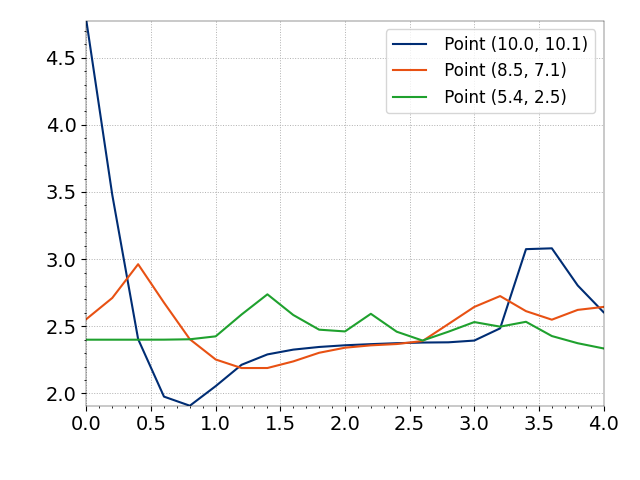

In [23]:
from IPython.display import Image
Image(filename='plot1d.png')

# time_poly action

This plot for each records in the file the value along a polyline.
This use the following function from postel:
  * plot1d
  * get_timeseries_on_polyline (from TelemacFile)

In [24]:
!plot.py time_poly -h

usage: plot.py time_poly [-h] [-v VAR] [--poly POLY [POLY ...]] [-f FIG_NAME]
                         input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -v VAR, --var VAR     Name of the variable to display
  --poly POLY [POLY ...]
                        List of points for the polyline x,y space separated
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [25]:
!plot.py time_poly f2d_gouttedo.slf -v "WATER DEPTH" -f plot1d_time_poly --poly 10.0,0.0 10.0,5.0 10.0,15.0 10.0,20.0

        ~> Plotting plot1d_time_poly


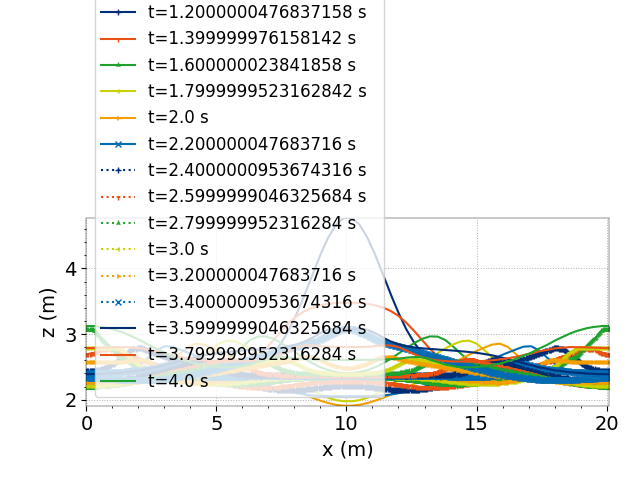

In [26]:
from IPython.display import Image
Image(filename='plot1d_time_poly.png')

# spec action

In [27]:
!plot.py spec -h

usage: plot.py spec [-h] [-p POINT] [-r RECORD] [-t TIME] [-f FIG_NAME]
                    input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -p POINT, --point POINT
                        Number of the point to display
  -r RECORD, --record RECORD
                        Record to display (If -1 is given will return the last
                        one)
  -t TIME, --time TIME  Time to display (will take the closest record)
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [28]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/tomawac/impose_spectra
!plot.py spec tom_OceanicResults_dt10.spe -p 2 -f plot2d_spe

        ~> Plotting plot2d_spe


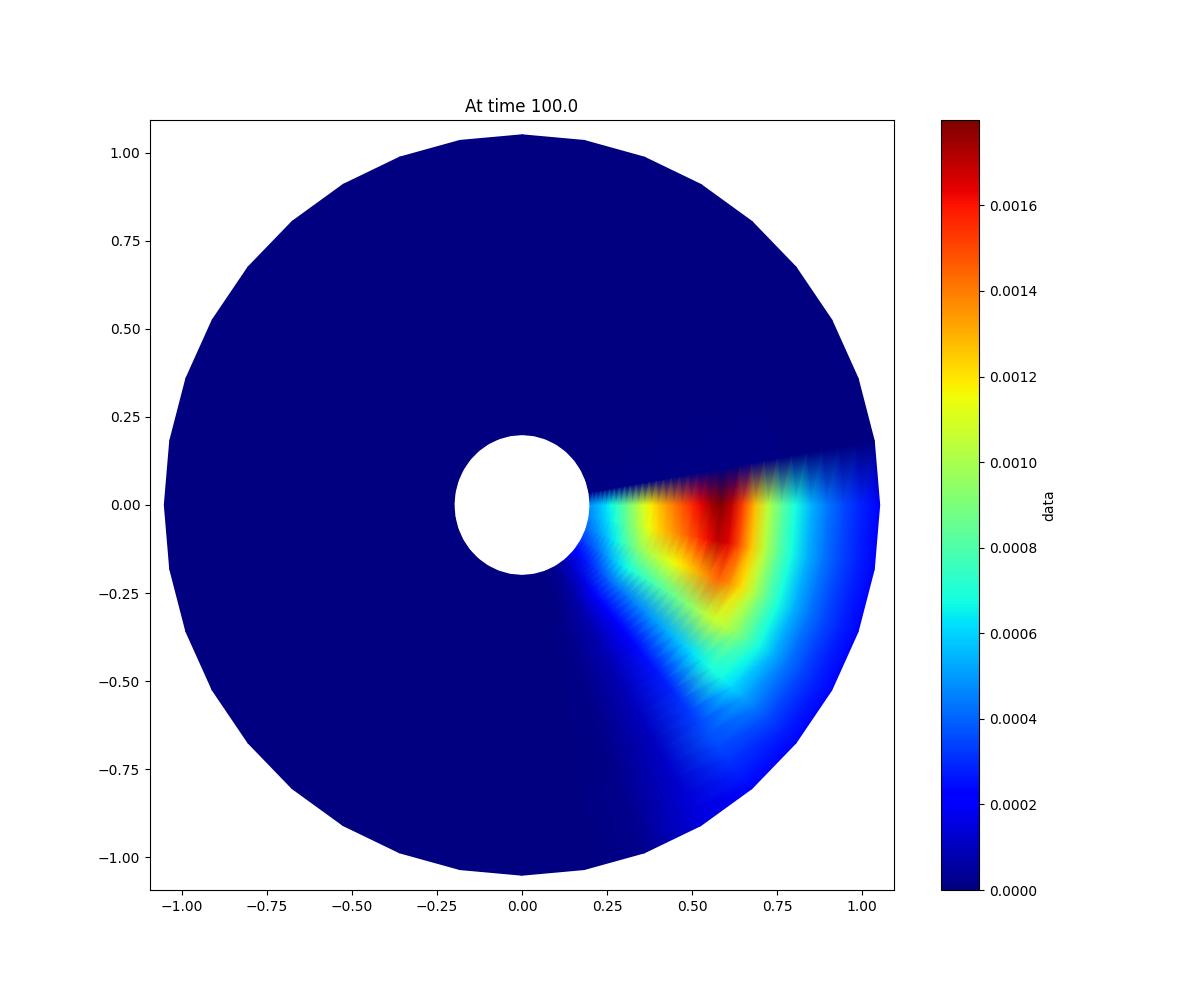

In [29]:
from IPython.display import Image
Image(filename='plot2d_spe.png')

# spec-freq action

In [30]:
!plot.py spec-freq -h

usage: plot.py spec-freq [-h] [-p [POINTS [POINTS ...]]] [-r RECORD] [-t TIME]
                         [-f FIG_NAME]
                         input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -p [POINTS [POINTS ...]], --points [POINTS [POINTS ...]]
                        Number of the points to display if none given display
                        them all
  -r RECORD, --record RECORD
                        Record to display (If -1 is given will return the last
                        one)
  -t TIME, --time TIME  Time to display (will take the closest record)
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [31]:
!plot.py spec-freq tom_OceanicResults_dt10.spe -p 3 26 43 -f plot1d_spe_freq

        ~> Plotting plot1d_spe_freq


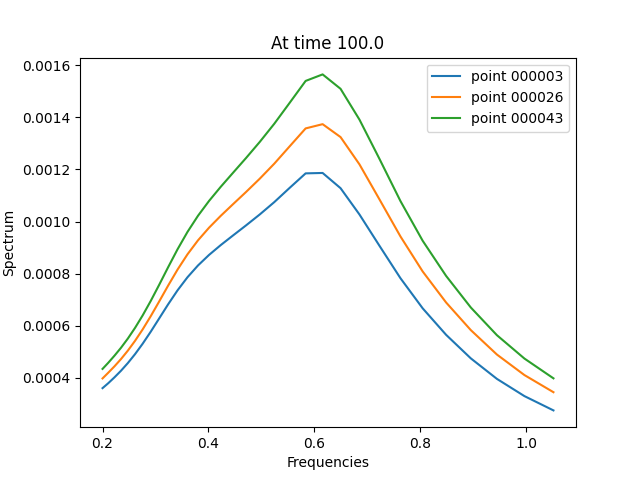

In [32]:
from IPython.display import Image
Image(filename='plot1d_spe_freq.png')

# spec-ang action

In [33]:
!plot.py spec-ang -h

usage: plot.py spec-ang [-h] [-p [POINTS [POINTS ...]]] [-r RECORD] [-t TIME]
                        [-f FIG_NAME]
                        input_file

positional arguments:
  input_file            Name of the input file extension also defines the
                        input format

optional arguments:
  -h, --help            show this help message and exit
  -p [POINTS [POINTS ...]], --points [POINTS [POINTS ...]]
                        Number of the points to display if none given display
                        them all
  -r RECORD, --record RECORD
                        Record to display (If -1 is given will return the last
                        one)
  -t TIME, --time TIME  Time to display (will take the closest record)
  -f FIG_NAME, --figure-name FIG_NAME
                        If given the figure will be saved in fig_name instead
                        of beeing displayed


In [34]:
!plot.py spec-ang tom_OceanicResults_dt10.spe -p 3 26 43 -f plot1d_spe_ang_disp

        ~> Plotting plot1d_spe_ang_disp


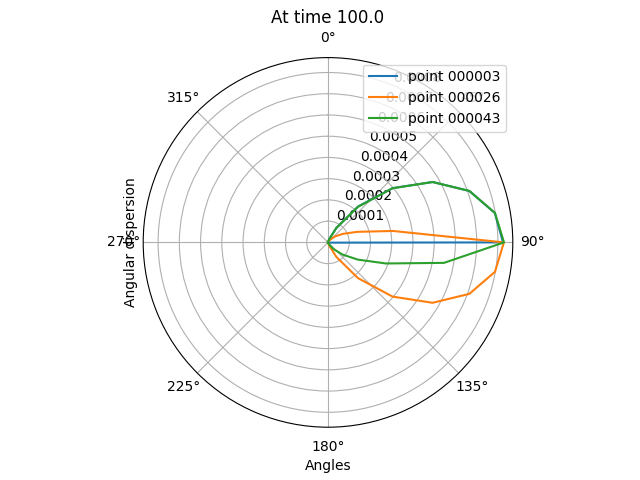

In [35]:
from IPython.display import Image
Image(filename='plot1d_spe_ang_disp.png')